In [20]:
import numpy as np
import math as m
import matplotlib.pyplot as mpl
import random


In [37]:
def f(x, t):

    return np.array([-5*x[0] - 6*x[1], 8*x[0] + 9*x[1]])

num_of_par = 2

def ans(t):

    return np.array(([[-3*np.exp(3*i) - np.exp(i), 4*np.exp(3*i) + np.exp(i)]for i in t]))

x_0 = np.array([-4, 5])


## Метод Эйлера прямой

In [22]:
def Euler_explicit(f, x_0, start, stop, n, num_of_par):
    tau = abs(start - stop)/(n-1)
    x = np.zeros((n, num_of_par))
    x[0] = x_0
    
    t = 0
    
    
    for i in range(n-1):
        x[i + 1] = x[i] + tau*f(x[i], t)
        t += tau
    return x

In [23]:
n_step = 100

t = np.linspace(0, 1, n_step)

x_ans = ans(t)
x_eu_1 = Euler_explicit(f, x_0, 0, 1, n_step, 2)

e = np.max(abs(x_eu_1 - x_ans))

#print(x_eu_1)
#print(x_ans)

print(e)

3.5147995812435653


## Метод Эйлера со средней точкой

In [24]:

def Euler_middle_point(f, x_0, start, stop, n, num_of_par):
    tau = abs(start - stop)/(n-1)
    x = np.zeros((n, num_of_par))
    x[0] = x_0
    
    t = 0
    
    
    for i in range(n-1):
        x[i + 1] = np.copy(x[i] + tau*f(x[i], t))
        x[i + 1] = np.copy(x[i] + tau*f((x[i] + x[i + 1])/2, t))
        
        t += tau
    return x

In [25]:
n_step = 100

t = np.linspace(0, 1, n_step)

x_ans = ans(t)
x_eu_1 = Euler_middle_point(f, x_0, 0, 1, n_step, 2)

e = np.max(abs(x_eu_1 - x_ans))

#print(x_eu_1)
#print(x_ans)

print(e)

0.036097616946065614


## Метод Рунге-Куты

In [26]:
def Euler_RK(f, x_0, start, stop, n, num_of_par):
    tau = abs(start - stop)/(n-1)
    x = np.zeros((n, num_of_par))
    x[0] = x_0
    
    t = 0
    
    
    for i in range(n-1):
        f1 = f(x[i], t)
        f2 = f(x[i] + tau/2*f1, t + tau/2)
        f3 = f(x[i] + tau/2*f2, t + tau/2)
        f4 = f(x[i] + tau*f3, t + tau)
        x[i + 1] = x[i] + tau/6*(f1 + 2*f2 + 2*f3 + f4)
        
        t += tau
    return x

In [27]:
n_step = 100

t = np.linspace(0, 1, n_step)

x_ans = ans(t)
x_eu_1 = Euler_RK(f, x_0, 0, 1, n_step, 2)

e = np.max(abs(x_eu_1 - x_ans))

#print(x_eu_1)
#print(x_ans)

print(e)

1.6516807050948046e-06


Прямой метод Эйлера k = 0.984998
Непрямой метод Эйлера с персечётом k = 1.99182
метод Рунге-Куты 4-го порядка k = 3.99116


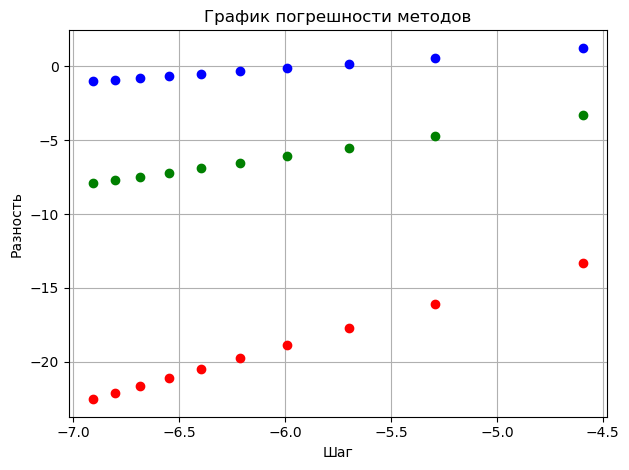

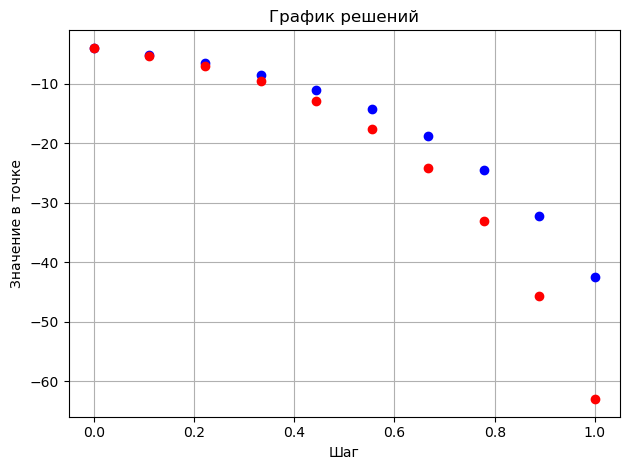

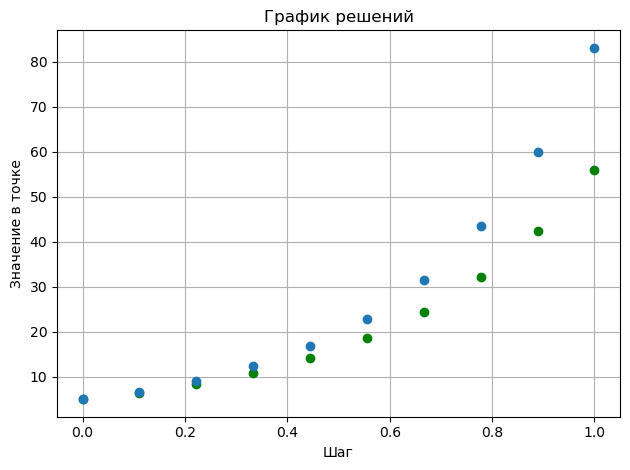

In [36]:

start = 0
stop = 1

eps_1 = []
eps_2 = []
eps_3 = []
steps = []

for n in range (100, 1100, 100):

    tau = abs(stop - start)/(n-1)
    
    t = np.linspace(start, stop, n)
    x_ans = ans(t) 
    
    x_1 = Euler_explicit(f, x_0, start, stop, n, num_of_par)
    x_2 = Euler_middle_point(f, x_0, start, stop, n, num_of_par)
    x_3 = Euler_RK(f, x_0, start, stop, n, num_of_par)
    
    eps_1.append(m.log(np.max(abs(x_1 - x_ans))))
    eps_2.append(m.log(np.max(abs(x_2 - x_ans))))
    eps_3.append(m.log(np.max(abs(x_3 - x_ans))))
    steps.append(m.log(tau))

k, b = np.polyfit(steps, eps_1, 1)
print('Прямой метод Эйлера k = %g' %(k))
mpl.plot(steps, eps_1, 'bo')
k, b = np.polyfit(steps, eps_2, 1)
print('Непрямой метод Эйлера с персечётом k = %g' %(k))
mpl.plot(steps, eps_2, 'go')
k, b = np.polyfit(steps, eps_3, 1)
print('метод Рунге-Куты 4-го порядка k = %g' %(k))
mpl.plot(steps, eps_3, 'ro')

mpl.grid()
mpl.xlabel('Шаг')
mpl.ylabel('Разность')
mpl.title('График погрешности методов')
mpl.tight_layout()
mpl.show()

n = 10
r_k = Euler_explicit(f, x_0, start, stop, n, num_of_par)
#r_k = Euler_middle_point(f, x_0, start, stop, n, num_of_par)
#r_k = Euler_RK(f, x_0, start, stop, n, num_of_par)
r_k1 = []
r_k2 = []
ref1 = []
ref2 = []
tau = (stop - start)/(n-1)

steps = np.linspace(start, stop, n)
x_ans = ans(steps) 


for i in range(n):

    ref1.append(x_ans[i][0])
    ref2.append(x_ans[i][1])
    r_k1.append(r_k[i][0])
    r_k2.append(r_k[i][1])

    
mpl.plot(steps, r_k1, 'bo')
#mpl.plot(steps, r_k2, 'go-', label=('метод Рунге-Куты 4-го порядка y'))
mpl.plot(steps, ref1, 'ro')
#mpl.plot(steps, ref2, 'o-', label=('Рещение y'))
mpl.grid()
mpl.xlabel('Шаг')
mpl.ylabel('Значение в точке')
mpl.title('График решений')

mpl.tight_layout()
mpl.show()

#mpl.plot(steps, r_k1, 'bo', label=('метод Рунге-Куты 4-го порядка x'))
mpl.plot(steps, r_k2, 'go')
#mpl.plot(steps, ref1, 'ro', label=('Рещение x'))
mpl.plot(steps, ref2, 'o')
mpl.grid()
mpl.xlabel('Шаг')
mpl.ylabel('Значение в точке')
mpl.title('График решений')

mpl.tight_layout()
mpl.show()

